In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
import snsims

In [5]:
from snsims import SersicSamples

In [6]:
print(snsims.__version__)

1.2.11


In [7]:
from desc.sims.GCRCatSimInterface.simCat_DC2sndb import DC2SN

/Users/rbiswas/soft/LSST3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_catalogs/2.4.2.sims+1/python/lsst/sims/catalogs/db/dbConnection.py:532: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/soft/LSST3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_catalogs/2.4.2.sims+1/python/lsst/sims/catalogs/db/dbConnection.py:532: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/soft/LSST3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_catalogs/2.4.2.sims+1/python/lsst/sims/catalogs/db/dbConnection.py:532: UserWarning: Duplicate object type id 4 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want glo

In [8]:
from astropy.cosmology import FlatLambdaCDM

In [9]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

### Hostless SN and SN hosted in galaxies

In [10]:
#galaxy file name (contains galaxies with data from the rotated reference catalog and the gcr)
galfilename = '/Users/rbiswas/data/LSST/DC2/protoDC2_rotated_combined.hdf'

In [11]:
galsdf = pd.read_hdf(galfilename).query('raJ2000 < 53.76 and raJ2000 > 52.48 and decJ2000 > -28.667 and decJ2000 < -27.25 ')

In [12]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha=2.6e-5,
                             fieldArea=9.6/6.0,
                             surveyDuration=10.,
                             cosmo=DC2,
                             zbinEdges=np.arange(0.001, 1.4, 0.02))

In [13]:
snPop = snsims.GMM_SALT2Params(numSN=None, zSamples=zdist.zSamples, rng=np.random.RandomState(2),
                               mjdmin=59580, cosmo=DC2, surveyDuration=10.)

In [14]:
sn = DC2SN(galsdf, snPop)

## Trivial to separate out the Hostless SN

In [15]:
sn.hostless_snparams.head()#to_csv('MainSurveyHostless.csv')

/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['snra'] = ra
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['sndec'] = dec


,c,mB,snid,t0,x0,x1,z,rand_host,snra,sndec
1,-0.055254,-19.419945,1,59674.630746,0.000218,0.424220,0.139496,0.946963,54.649110,-29.172931
15,0.044861,-18.953541,15,62446.473290,0.000069,-0.509370,0.193831,0.978427,56.165622,-28.337408
24,-0.062482,-19.274660,24,60044.133897,0.000082,0.473463,0.204479,0.942166,52.564572,-27.443538
49,-0.073286,-19.612665,49,63061.159128,0.000058,1.492690,0.272870,0.955740,54.075663,-28.633108
50,-0.087108,-19.491234,50,61566.359785,0.000053,0.381129,0.269674,0.901602,53.297779,-28.167989


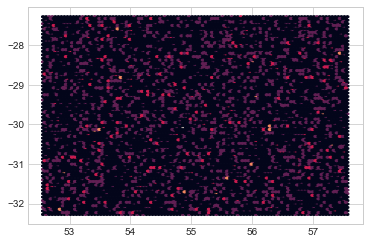

In [16]:
fig, ax = plt.subplots()
ax.hexbin(sn.hostless_snparams.snra, sn.hostless_snparams.sndec)

In [17]:
sn.hostless_snparams.to_csv('../data/uDDF_hostlessSN.csv', index=False, sep=' ')

In [18]:
!wc -l ../data/uDDF_hostlessSN.csv

    2676 ../data/uDDF_hostlessSN.csv


In [19]:
uDDFMapper, hostedSNParams = sn.assignHosts()

/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.z // binwidth
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.zbin.astype(np.int)
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:99:

Index(['snid'], dtype='object')


In [20]:
uDDFMapper.head()

,galaxy_id
snid,
0,5481355
2,11725278
3,11726929
4,11728802
5,11097026


In [21]:
hostedSNParams.columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'rand_host', 'zbin', 'diskMassStellar',
       'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'z', 'zbin_gals', 'snid'],
      dtype='object')

In [22]:
hostedSNParamsPos = sn.get_positions(hostedSNParams, np.random.RandomState(3))

In [23]:
hostedSNParamsPos.head()

,c,mB,t0,x0,x1,rand_host,zbin,diskMassStellar,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,...,size_disk_true,totalMassStellar,uniqueId,raJ2000_gal,decJ2000_gal,z,zbin_gals,snid,snra,sndec
galaxy_id,,,,,,,,,,,,,,,,,,,,,
5481355,-0.044989,-19.336775,61171.381393,0.000229,1.134703,0.517298,6,2.072131e+10,0.988935,0.491075,...,0.988935,4.252911e+10,5612907599,53.427878,-27.814555,0.127084,6,0,53.427972,-27.814415
11725278,-0.043609,-19.195879,61586.268044,0.000160,0.341140,0.765460,7,1.744369e+09,1.034008,0.688732,...,1.034008,2.287549e+10,12006684751,53.609907,-28.318780,0.142219,7,2,53.609854,-28.318485
11726929,-0.108999,-19.635365,61168.926733,0.000254,0.967812,0.282396,7,6.183270e+09,0.959535,0.748890,...,0.959535,1.455183e+10,12008375375,53.427252,-28.560170,0.150429,7,3,53.427184,-28.560290
11728802,-0.062228,-19.196680,61114.342478,0.000140,-1.508404,0.221045,7,1.405775e-05,0.609599,0.387576,...,0.609599,1.097197e+11,12010293327,53.275190,-27.946412,0.140677,7,4,53.280792,-27.935769
11097026,0.097512,-18.688673,60785.722097,0.000086,0.265815,0.686222,7,8.552505e+09,2.463615,1.493036,...,2.463615,3.674140e+10,11363354703,53.445548,-28.140549,0.151325,7,5,53.444936,-28.140640


In [24]:
hostedSNParamsPos.to_csv('../data/uDDFHostedSNPositions.csv', sep=' ', index=True)

In [25]:
!head ../data/uDDFHostedSNPositions.csv

galaxy_id c mB t0 x0 x1 rand_host zbin diskMassStellar morphology/diskHalfLightRadiusArcsec morphology/diskMinorAxisArcsec morphology/positionAngle morphology/spheroidHalfLightRadiusArcsec morphology/spheroidMinorAxisArcsec size_bulge_true size_disk_true totalMassStellar uniqueId raJ2000_gal decJ2000_gal z zbin_gals snid snra sndec
5481355 -0.04498873396058662 -19.336775191519067 61171.381392818315 0.00022905252046758989 1.1347026076328575 0.5172978838465893 6 20721310559.256874 0.9889348015795835 0.4910748182408204 86.89275632394077 2.0640746593172734 1.3054281963079484 2.0640746593172734 0.9889348015795835 42529107625.15047 5612907599 53.42787807 -27.81455496 0.12708366 6 0 53.42797170103561 -27.81441520987564
11725278 -0.04360874978356073 -19.19587894374082 61586.26804425729 0.0001599396096185289 0.3411402591104208 0.7654597593969069 7 1744369051.628239 1.0340077650897563 0.6887315478214101 115.00772273749894 3.7341794289697035 2.7915721464655747 3.7341794289697035 1.034007765089756

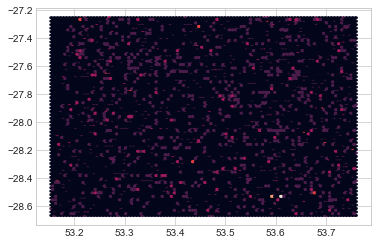

In [26]:
fig, ax = plt.subplots()
ax.hexbin(hostedSNParamsPos.snra, hostedSNParamsPos.sndec)